# Simple LangGraph Workflow

In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages

# State that will be maintained by the run within the graph
class State(TypedDict):
    user: str
    # Messages is of type list, with additional metadata provided by add_messages
    # The add_messages defines the messages list state value to append rather than overwrite
    messages: Annotated[list, add_messages]

## Simple Chatbot node for LangGraph

In [2]:
from langchain_ollama import ChatOllama


llm = ChatOllama(model="qwen3:4b", temperature=0.7)

def simple_chatbot(state: State):
    response = llm.invoke(state["messages"])
    customized_response = f"{state['user'].capitalize()}, here's my response: {response.content}"
    
    return {"messages": [customized_response]}

c:\Users\shang\Volume\sandbox\repos\bella-keys-personal-assist\services\bella-chat-service\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Build the graph and compile the chain

In [3]:
from langgraph.graph import StateGraph, START, END

# Create the state graph
graph = StateGraph(State)

# Add the nodes
graph.add_node("simple_chatbot", simple_chatbot)

# Add edges
graph.add_edge(START, "simple_chatbot")
graph.add_edge("simple_chatbot", END)
# Compile
chain = graph.compile()

## View the graph

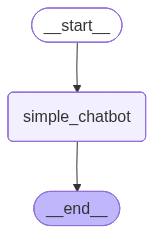

In [4]:
from IPython.display import Image, display

# Show Graph
display(Image(chain.get_graph().draw_mermaid_png()))

## Invoking the chain

In [5]:
# Invoke the chain
response = chain.invoke({"user": "shangar", "messages": "Tell me a dad joke."})
print(response["messages"])
print(response["messages"][-1].content)

[HumanMessage(content='Tell me a dad joke.', additional_kwargs={}, response_metadata={}, id='8d61fb14-f2bc-4787-a000-551c02165247'), HumanMessage(content='Shangar, here\'s my response: Here\'s a classic dad joke for you:  \n\n**"I\'m reading a book about anti-gravity... it\'s impossible to put down!"** 😄  \n\n*(P.S. If you need another, just say the word — I\'ve got a whole library of these!)*', additional_kwargs={}, response_metadata={}, id='c358a0e9-4643-4295-8ed7-30bcc4cdd0a9')]
Shangar, here's my response: Here's a classic dad joke for you:  

**"I'm reading a book about anti-gravity... it's impossible to put down!"** 😄  

*(P.S. If you need another, just say the word — I've got a whole library of these!)*


In [6]:
# Invoke the chain with Streaming (Print the entire event objects)
for event in chain.stream({"user": "shangar", "messages": "Tell me a dad joke."}):
    print(event)

{'simple_chatbot': {'messages': ['Shangar, here\'s my response: Here\'s a classic dad joke that’s perfect for a quick laugh:\n\n**Why don’t scientists trust atoms?**  \n*Because they make up everything!*\n\n*(Bonus: It’s a pun on "make up" meaning both "to create" and "to be dishonest" — classic dad logic!)* 😄\n\n*Why this works*: Short, silly, and the punchline lands without needing context. Dad jokes thrive on simple wordplay that makes you go *"Huh? Wait... that’s kinda dumb but also kinda brilliant!"*  \n\nLet me know if you want another — I’ve got a whole cabinet of \'em! 🔒']}}


In [7]:
# Invoke the chain with Streaming (Print only the event values)
for event in chain.stream({"user": "shangar", "messages": "Tell me a dad joke."}):
    for value in event.values():
        print(value)

{'messages': ['Shangar, here\'s my response: Here\'s a classic dad joke for you:\n\n**"I\'m reading a book about anti-gravity... it\'s impossible to put down!"** 📚\n\n*(Why it\'s a dad joke: It\'s so stupid it\'s funny, and it’s a *perfect* example of the "impossible to put down" pun that dad jokes love.)*\n\nHope that gives you a chuckle! 😄']}
